In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

low_memory = False

# Read csv into pandas dataframe
df = pd.read_csv('train.csv')

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [182]:
# Filter data to show yards gained on each play
yards = df.groupby('PlayId').max()[['Yards']]
yards

,Yards
PlayId,
20170907000118,8
20170907000139,3
20170907000189,5
20170907000345,2
20170907000395,7
20170907000473,10
20170907000516,-1
20170907000653,0
20170907000680,9


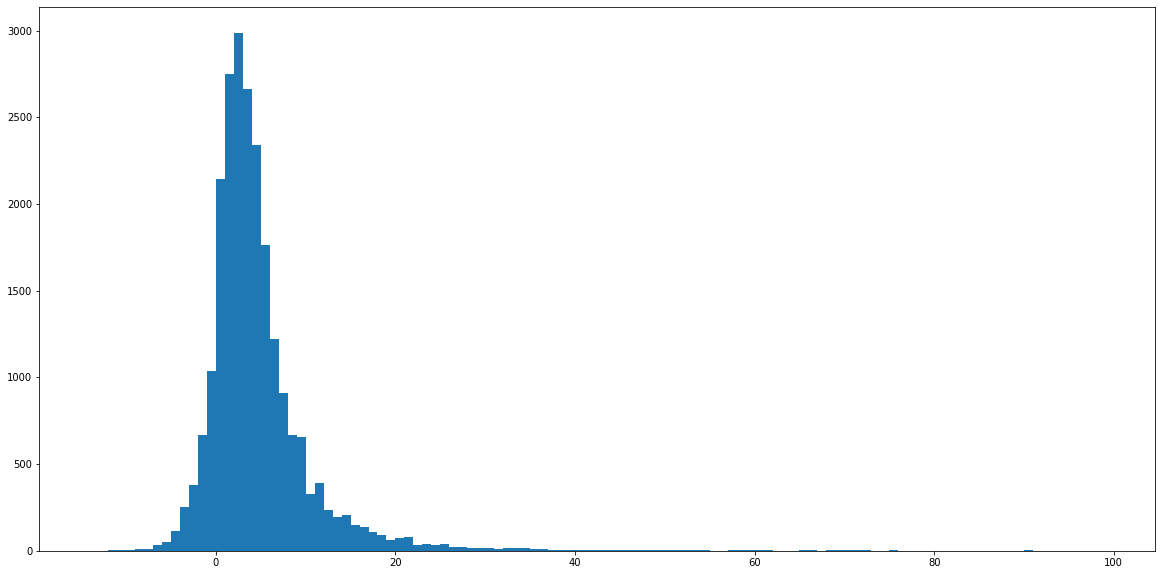

In [7]:
# Build Histogram/Probability Distribution Of Yards gained on each play
plt.figure(figsize=(20,10))
plt.hist(yards['Yards'], bins=range(min(yards['Yards']), max(yards['Yards']) + 1, 1))
plt.show()

In [140]:
dist = np.histogram(yards, bins = 199, range = (-99, 99))[0] / len(yards) #find probability for each bin
cumul_sum = np.cumsum(dist)
cumul_sum_play = np.insert(cumul_sum, 0, None)

In [141]:
sample_sub = pd.read_csv('sample_submission.csv').rename(columns={"Unnamed: 0": "PlayId"}) #bring in sample sumbission
sample_sub.iloc[0] = cumul_sum_play #place cumulative sum into submission format
sample_sub

,PlayId,Yards-99,Yards-98,Yards-97,Yards-96,Yards-95,Yards-94,Yards-93,Yards-92,Yards-91,...,Yards90,Yards91,Yards92,Yards93,Yards94,Yards95,Yards96,Yards97,Yards98,Yards99
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0


In [200]:
sub_almost = sample_sub.iloc[np.arange(len(sample_sub)).repeat(len(yards))].drop('PlayID', axis = 1)

yards_hist_sub = sub_almost
yards_hist_sub['PlayId'] = np.array(yards.index)
yards_hist_sub #Final Submission File to Score

,PlayId,Yards-99,Yards-98,Yards-97,Yards-96,Yards-95,Yards-94,Yards-93,Yards-92,Yards-91,...,Yards90,Yards91,Yards92,Yards93,Yards94,Yards95,Yards96,Yards97,Yards98,Yards99
0,20170907000118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
0,20170907000801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.999871,0.999871,0.999914,0.999914,0.999914,0.999914,0.999914,0.999957,0.999957,1.0
